In [1]:
import pandas as pd

In [3]:
## Check the day with the highest heat pump load


df_hp = pd.read_pickle("./input/2019 Hamelin 500 HP.pkl")
print(df_hp.sum(axis=1).idxmax())

## Check the day with the highest EV load


df_ev = pd.read_pickle("./input/2019 Hamelin 500 EV.pkl")
print(df_ev.sum(axis=1).idxmax())


## Check the day with the highest PV generation

df_pv = pd.read_csv("./input/ninja_pv_52.1040_9.3562_uncorrected.csv",skiprows=3)
df_pv.index = df_hp.index
print(df_pv["electricity"].idxmax())


2019-12-12 07:00:00+00:00
2019-11-04 01:00:00+00:00
2019-04-10 11:00:00+00:00


In [4]:
grid = "176"

In [5]:
df_target = pd.read_csv("./grids/"+grid+"/residential_loads_active_power.csv")


In [6]:
df_dyn = pd.read_csv("./grids/"+grid+"/residential_loads_active_power_dynamic.csv")
df_constant = pd.read_csv("./grids/"+grid+"/residential_loads_active_power_constant.csv")

In [7]:
df_dyn = df_dyn.set_index("snapshot")
df_constant  = df_constant.set_index("snapshot")
df_target = df_target.set_index("snapshot")

In [8]:
df_target_sum = df_target.sum(axis=1)
df_dyn_sum = df_dyn.sum(axis=1)
df_constant_sum = df_constant.sum(axis=1)



In [9]:
df_compare = pd.DataFrame()
df_compare.index = df_target.index
df_compare["Status Quo"] = df_target_sum.values
df_compare["Flat tariffs"] = df_constant_sum.values
df_compare["Dynamic tariffs"] = df_dyn_sum.values

In [10]:
df_compare.index = pd.to_datetime(df_compare.index)

<AxesSubplot: xlabel='snapshot'>

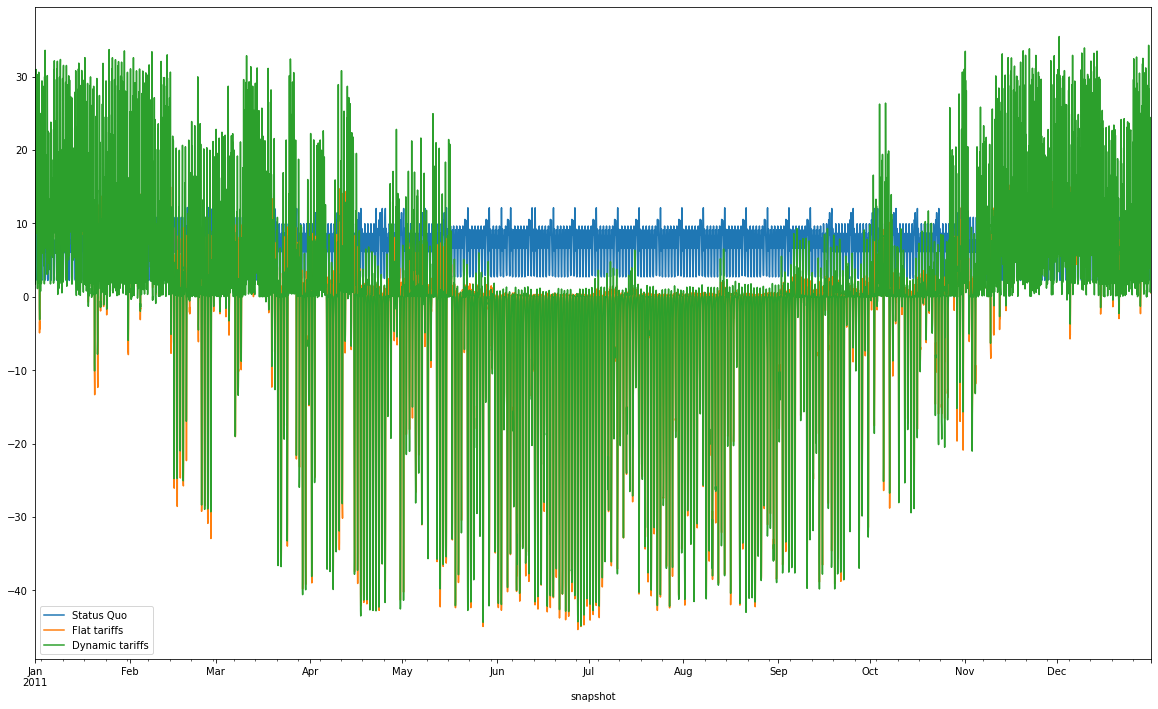

In [11]:
df_compare.plot(figsize=(20,12))

<AxesSubplot: xlabel='snapshot'>

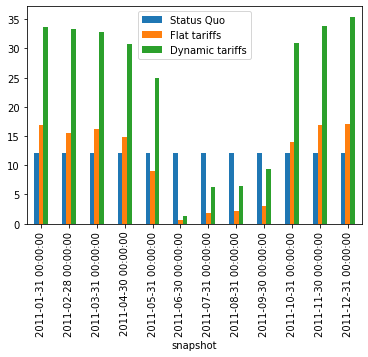

In [12]:
df_compare.resample("M").max().plot.bar()

<AxesSubplot: xlabel='snapshot'>

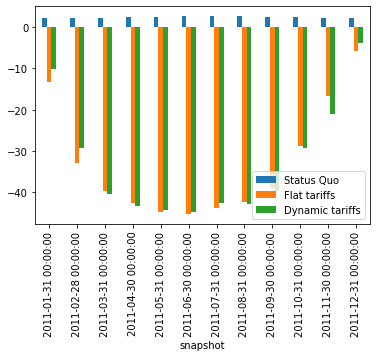

In [13]:
df_compare.resample("M").min().plot.bar()

<AxesSubplot: xlabel='snapshot'>

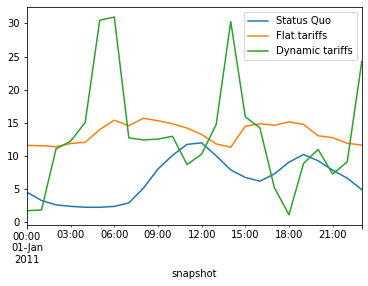

In [14]:
df_compare.iloc[:24].plot()

In [15]:
# kW per household at max peak
df_compare.max()/df_target.shape[1]*1000

Status Quo         1.301744
Flat tariffs       1.833465
Dynamic tariffs    3.794852
dtype: float64

In [16]:
# kW per household at max peak, absolute values
df_compare.abs().max()/df_target.shape[1]*1000

Status Quo         1.301744
Flat tariffs       4.852056
Dynamic tariffs    4.798008
dtype: float64

In [17]:
df_compare

,Status Quo,Flat tariffs,Dynamic tariffs
snapshot,,,
2011-01-01 00:00:00,4.524069,11.574850,1.720421
2011-01-01 01:00:00,3.258765,11.537121,1.833644
2011-01-01 02:00:00,2.608749,11.391021,11.065846
2011-01-01 03:00:00,2.380114,11.865565,12.224612
2011-01-01 04:00:00,2.241776,12.046372,15.041246
...,...,...,...
2011-12-31 19:00:00,12.162198,13.345302,7.045200
2011-12-31 20:00:00,9.953415,12.352639,14.491267
2011-12-31 21:00:00,7.761418,11.891010,20.487284


In [18]:
grids = ["176","1056", "1690", "2534", "177", "176", "1811"]
grids = ["176"]
for grid in grids:
    for dynamic_share in range(1,3):
        dynamic_share_float = dynamic_share/10
        num_columns_from_dyn = int(len(df_dyn.columns) * dynamic_share_float)
        df_combined = pd.read_csv("./grids/"+grid+"/residential_loads_active_power_dynamic"+str(dynamic_share_float)+".csv")
        df_compare[str(dynamic_share_float)+" Dynamic Tariffs"] = df_combined.drop("Unnamed: 0",axis=1).set_index("snapshot").sum(axis=1).values
        
    

FileNotFoundError: [Errno 2] No such file or directory: './grids/176/residential_loads_active_power_dynamic0.1.csv'

In [ ]:
df_combined

In [ ]:
df_compare.drop("934 Dynamic Tariffs",axis=1).resample("M").max().plot.bar()